In [1]:
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
outpath='HAT-264-0000857.rlc.tfalc'
data=Table.read(outpath,format='ascii')
t=data['col2']
mag=data['col8']

Text(0.5, 0, 'time (BJD-2454833)')

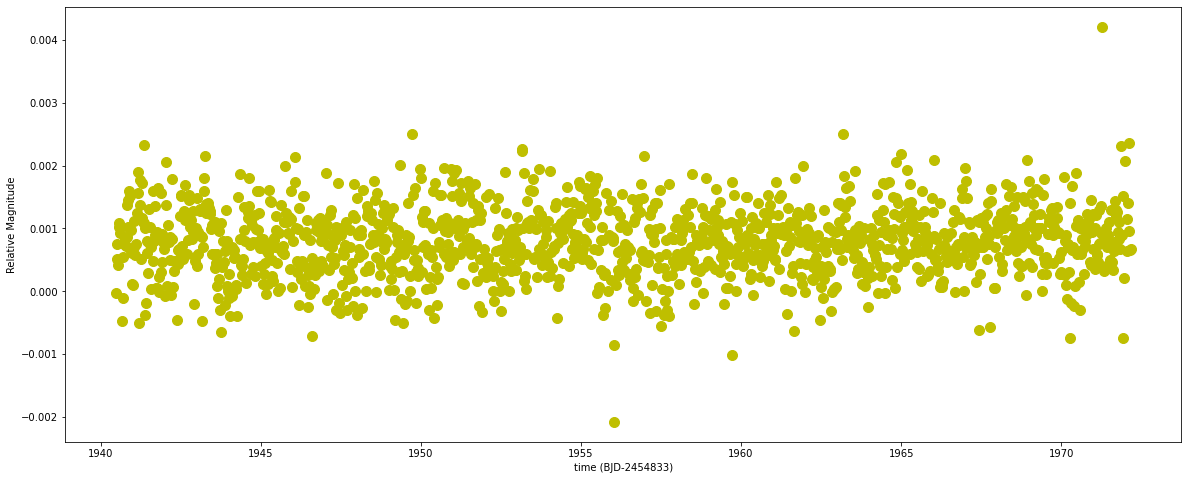

In [3]:
plt.figure(figsize=(20,8))
plt.plot(t,mag,'yo',markersize=10,label='HAT-264-0000857')
plt.ylabel('Relative Magnitude')
plt.xlabel('time (BJD-2454833)')

In [4]:
import astrobase
from astrobase import periodbase, checkplot
periodbase.use_astropy_bls()

[I 200817 14:19:47 __init__:84] An Astropy implementation of BLS is available because Astropy >= 3.1.
[I 200817 14:19:47 __init__:86] If you want to use it as the default periodbase BLS runner, call the periodbase.use_astropy_bls() function.


In [5]:
dates=data['col2']
fluxes=data['col8']
errs=fluxes*0.01

In [6]:
glsp = periodbase.pgen_lsp(dates,fluxes,errs)

[I 200817 14:19:49 zgls:597] using autofreq with 1580 frequency points, start P = 0.100, end P = 31.690
[I 200817 14:19:49 zgls:607] using 6 workers...


In [7]:
cp = checkplot.checkplot_png(glsp, dates, fluxes, errs)

[I 200817 14:19:52 nonphysical:216] spline fit done. nknots = 13,  chisq = 11918614.11038, reduced chisq = 8776.59360
[I 200817 14:19:52 png:696] plotting phased LC with period 0.138141, epoch 1965.34295
[I 200817 14:19:52 nonphysical:216] spline fit done. nknots = 13,  chisq = 12231094.59589, reduced chisq = 9006.69705
[I 200817 14:19:52 png:696] plotting phased LC with period 0.069071, epoch 1965.34295
[I 200817 14:19:52 nonphysical:216] spline fit done. nknots = 13,  chisq = 11931134.56910, reduced chisq = 8785.81338
[I 200817 14:19:52 png:696] plotting phased LC with period 0.276282, epoch 1965.34295
[I 200817 14:19:52 nonphysical:216] spline fit done. nknots = 13,  chisq = 12285800.71650, reduced chisq = 9046.98138
[I 200817 14:19:52 png:696] plotting phased LC with period 0.120676, epoch 1944.33920
[I 200817 14:19:52 nonphysical:216] spline fit done. nknots = 13,  chisq = 12315444.09914, reduced chisq = 9068.81009
[I 200817 14:19:52 png:696] plotting phased LC with period 0.42939

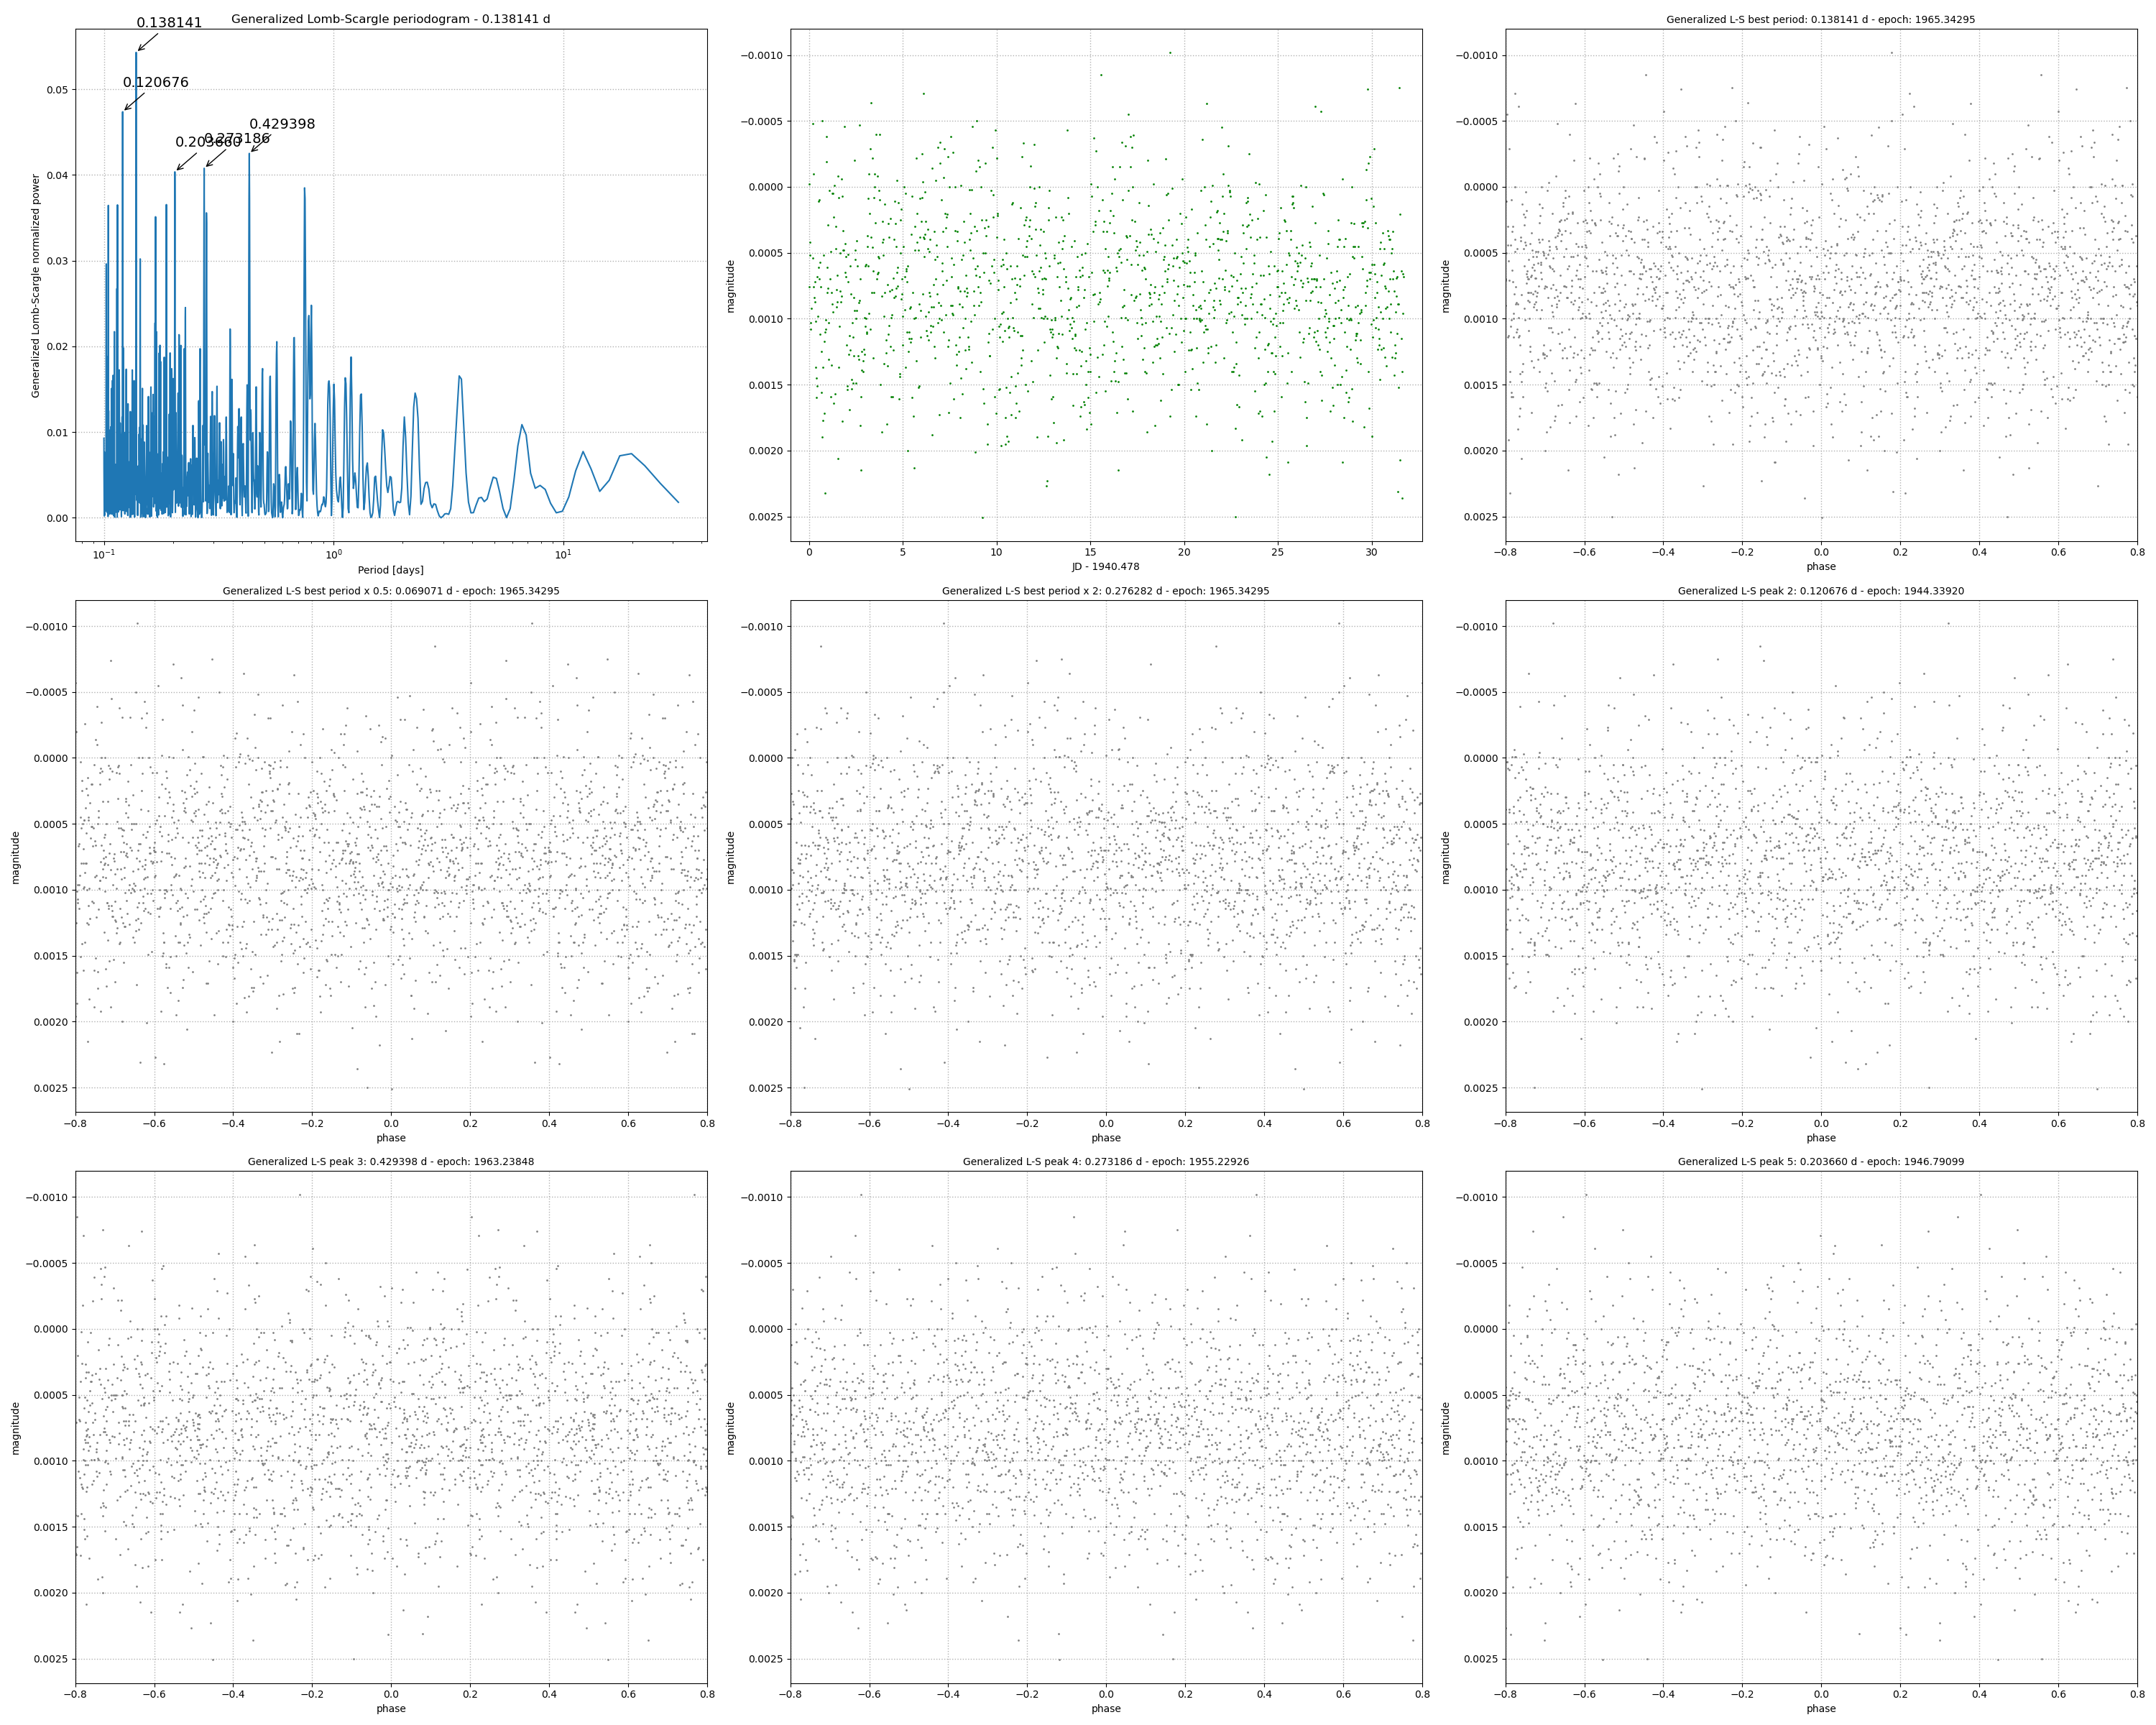

In [8]:
from IPython.display import Image
Image('0000857-checkplot-glsp.png')

In [9]:
glsp

{'bestperiod': 0.13814104803836055,
 'bestlspval': 0.05431069430968211,
 'nbestpeaks': 5,
 'nbestlspvals': [0.05431069430968211,
  0.04737564363255664,
  0.04252025833761755,
  0.04078490073374706,
  0.04036840130319534],
 'nbestperiods': [0.13814104803836055,
  0.120676147829398,
  0.4293977834688335,
  0.2731858312068958,
  0.20366038830334135],
 'lspvals': array([0.00180583, 0.00403102, 0.00607102, ..., 0.00384993, 0.00585613,
        0.00928429]),
 'omegas': array([ 0.19827306,  0.23792767,  0.27758228, ..., 62.73359604,
        62.77325065, 62.81290527]),
 'periods': array([31.68955642, 26.40796368, 22.63539744, ...,  0.10015663,
         0.10009336,  0.10003017]),
 'method': 'gls',
 'kwargs': {'startp': None,
  'endp': None,
  'stepsize': 0.0001,
  'autofreq': True,
  'periodepsilon': 0.1,
  'nbestpeaks': 5,
  'sigclip': 10.0}}

In [10]:
print('LS algorithm:',(glsp['nbestperiods']),'(days)')

LS algorithm: [0.13814104803836055, 0.120676147829398, 0.4293977834688335, 0.2731858312068958, 0.20366038830334135] (days)


In [11]:
bls=periodbase.bls_parallel_pfind(dates,fluxes,errs)

[I 200817 14:20:31 abls:919] min P: 0.1, max P: 100.0, nfreq: 126632, minfreq: 0.01, maxfreq: 10.0
[I 200817 14:20:31 abls:922] autofreq = True: using AUTOMATIC values for freq stepsize: 7.8890343773389e-05, ndurations: 100, min transit duration: 0.01, max transit duration: 0.4
[W 200817 14:20:31 abls:964] the requested max P = 100.000 is larger than the time base of the observations = 31.690,  will make minfreq = 2 x 1/timebase
[W 200817 14:20:31 abls:969] new minfreq: 0.06311227501871121, maxfreq: 10.0
[I 200817 14:20:31 abls:980] using 6 workers...
[I 200817 14:20:31 abls:1090] worker 1: minfreq = 0.063112, nfreqs = 21105
[I 200817 14:20:31 abls:1090] worker 2: minfreq = 1.728093, nfreqs = 21105
[I 200817 14:20:31 abls:1090] worker 3: minfreq = 3.393074, nfreqs = 21105
[I 200817 14:20:31 abls:1090] worker 4: minfreq = 5.058054, nfreqs = 21105
[I 200817 14:20:31 abls:1090] worker 5: minfreq = 6.723035, nfreqs = 21105
[I 200817 14:20:31 abls:1090] worker 6: minfreq = 8.388016, nfreqs 

In [12]:
cp = checkplot.checkplot_png(bls, dates, fluxes, errs)

[W 200817 14:20:43 png:1142] no best period found for this object, skipping...


In [13]:
spdm = periodbase.stellingwerf_pdm(dates,fluxes,errs)

[I 200817 14:20:47 spdm:337] using autofreq with 1580 frequency points, start P = 0.100, end P = 31.690
[I 200817 14:20:47 spdm:349] using 6 workers...


In [14]:
cp = checkplot.checkplot_png(spdm, dates, fluxes, errs)

[I 200817 14:20:50 nonphysical:216] spline fit done. nknots = 13,  chisq = 12495149.55692, reduced chisq = 9201.14106
[I 200817 14:20:50 png:696] plotting phased LC with period 9.902986, epoch 1960.74581
[I 200817 14:20:50 nonphysical:216] spline fit done. nknots = 13,  chisq = 12371873.05895, reduced chisq = 9110.36308
[I 200817 14:20:50 png:696] plotting phased LC with period 4.951493, epoch 1941.04971
[I 200817 14:20:50 nonphysical:216] spline fit done. nknots = 13,  chisq = 12946343.75291, reduced chisq = 9533.39010
[I 200817 14:20:50 png:696] plotting phased LC with period 19.805973, epoch 1960.27588
[I 200817 14:20:50 nonphysical:216] spline fit done. nknots = 13,  chisq = 12772182.04618, reduced chisq = 9405.14142
[I 200817 14:20:50 png:696] plotting phased LC with period 2.005668, epoch 1966.54843
[I 200817 14:20:50 nonphysical:216] spline fit done. nknots = 13,  chisq = 12655138.51085, reduced chisq = 9318.95325
[I 200817 14:20:50 png:696] plotting phased LC with period 12.188

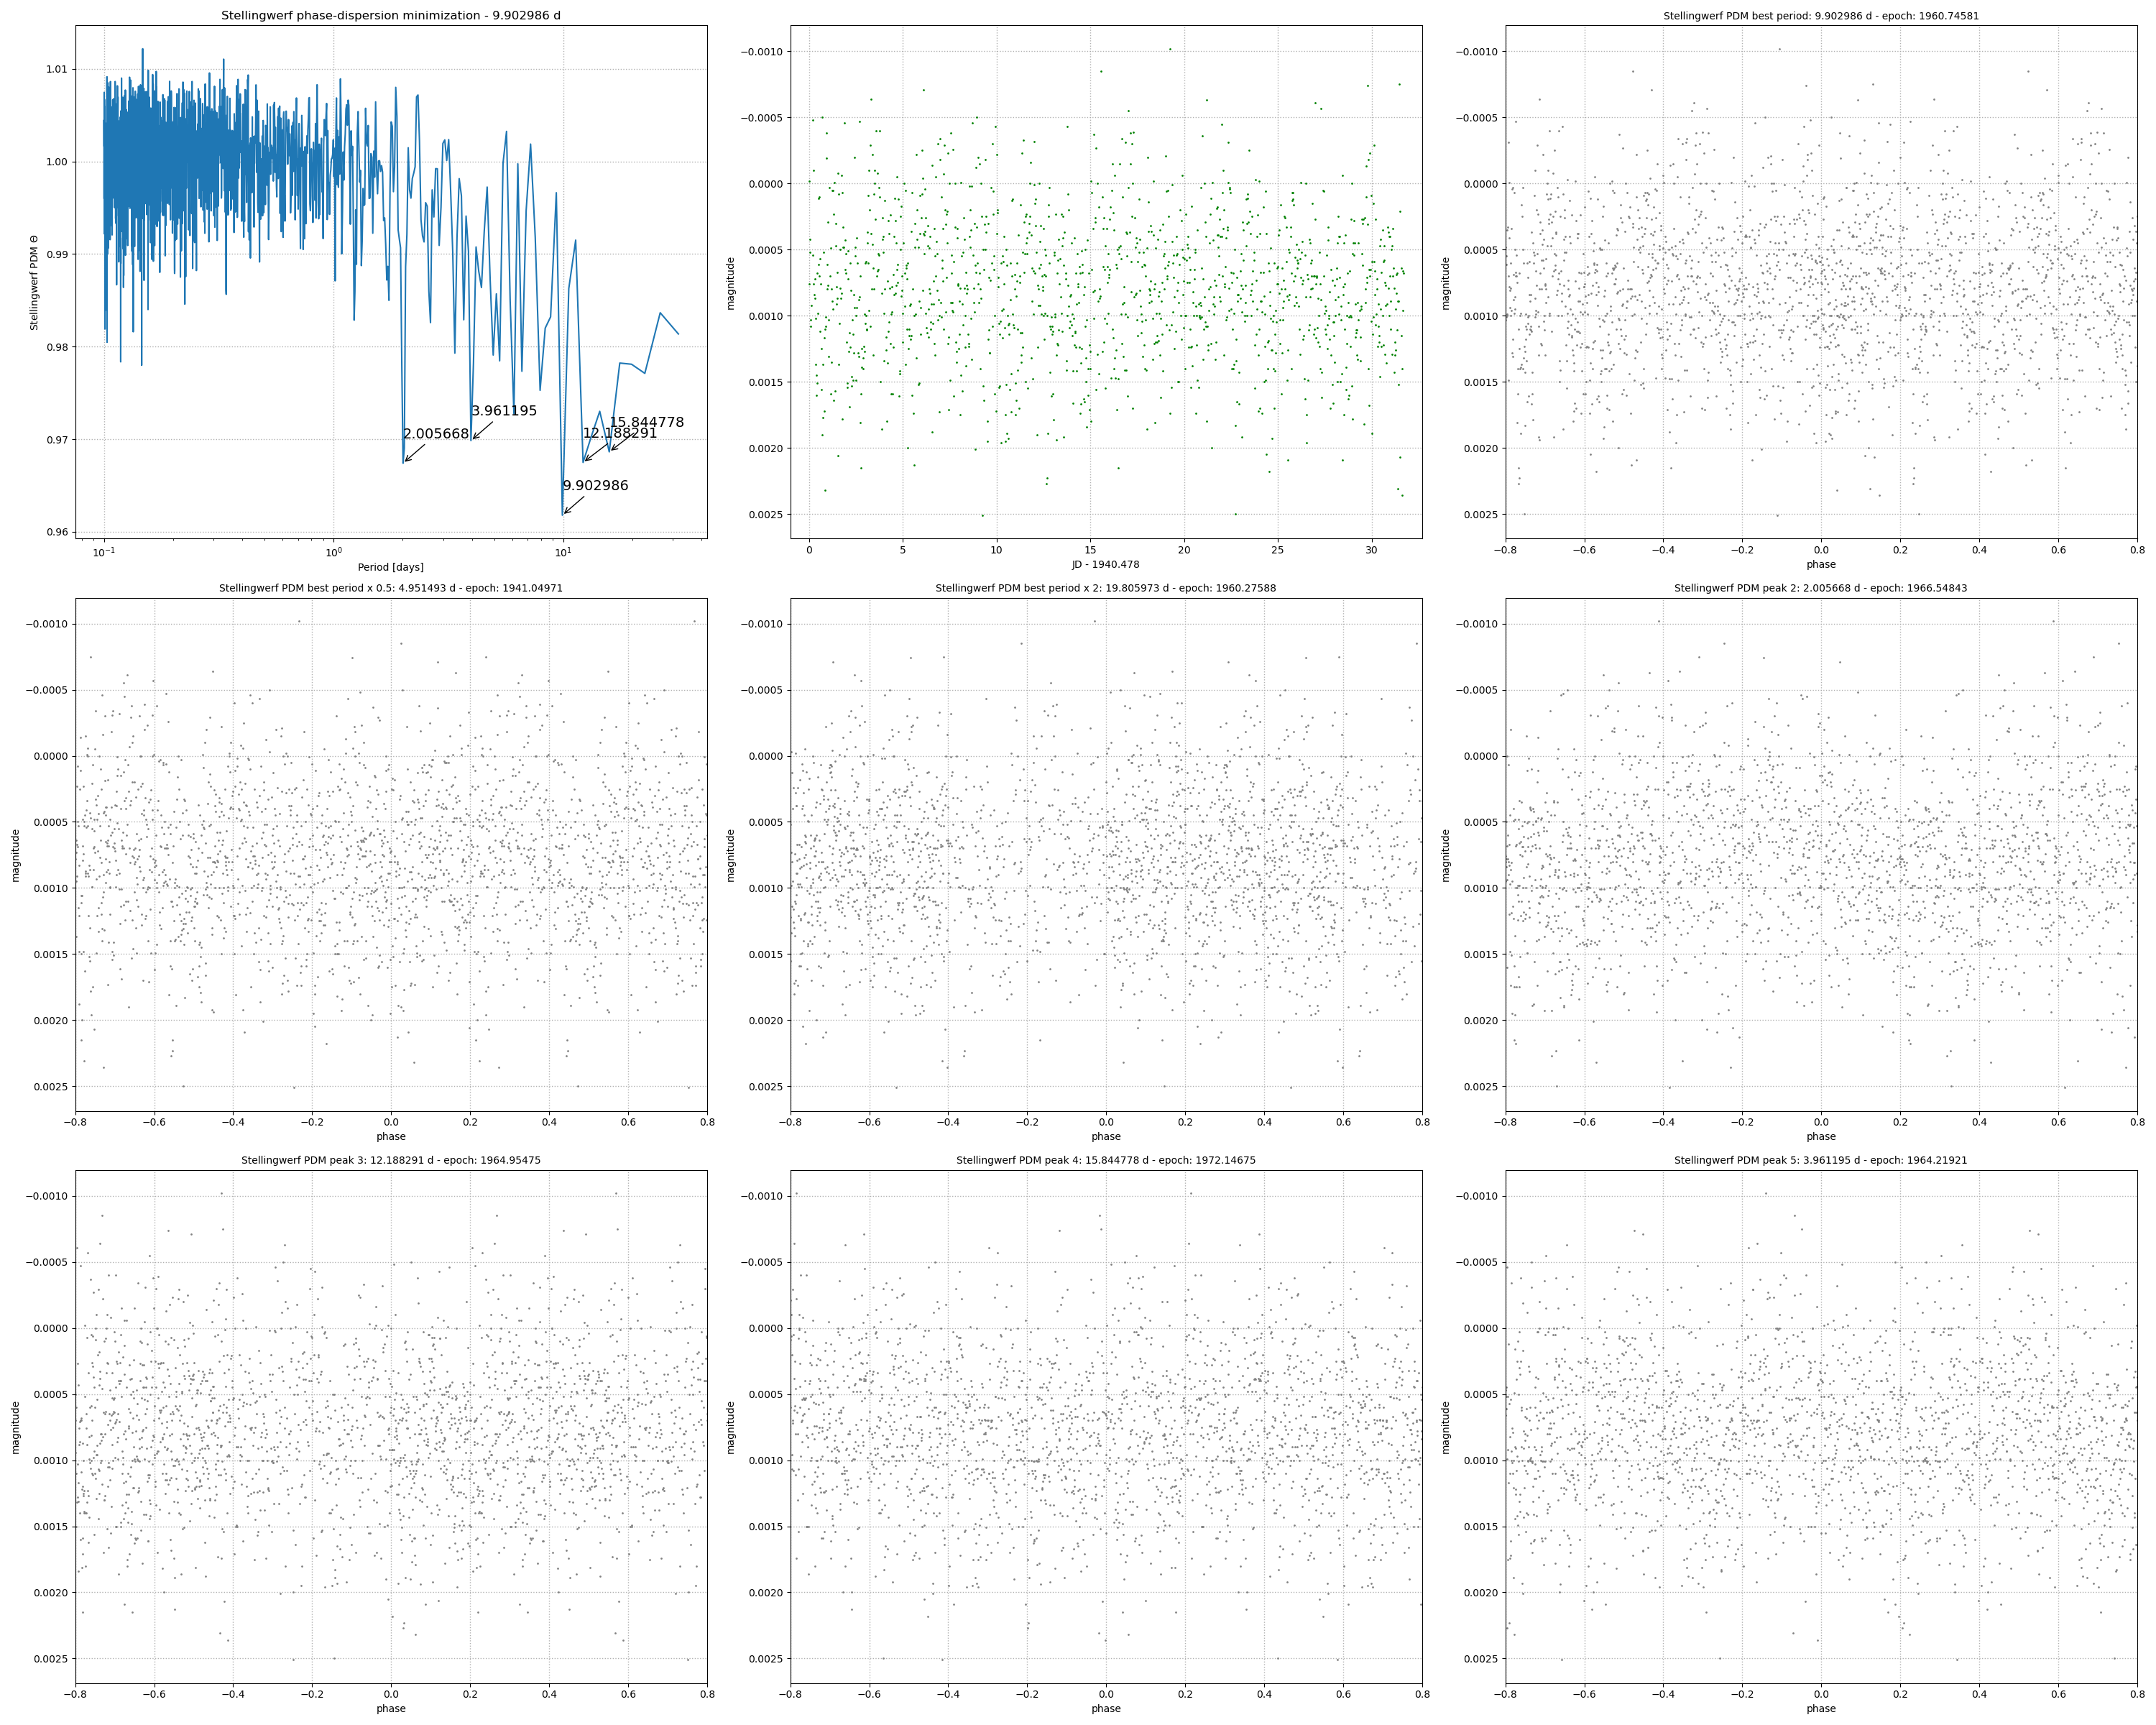

In [15]:
Image('0000857-checkplot-spdm.png')

In [16]:
print('PDM algorithm:',(spdm['nbestperiods']),'(days)')

PDM algorithm: [9.902986381249974, 2.0056681278480957, 12.188290930769197, 15.844778209999957, 3.961194552499989] (days)
